# Прикладные дифференциальные уравнения
## Занятие 5
*Илья Щуров*

Факультет компьютерных наук, Прикладная математики и информатика, 2021-22 учебный год

[Страница курса](http://math-info.hse.ru/2021-22/Прикладные_дифференциальные_уравнения)

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Модельная система

$$
\begin{pmatrix}
\dot x \\
\dot y
\end{pmatrix}=
\begin{pmatrix}
\varepsilon & 1 \\
-1 & \varepsilon
\end{pmatrix}
\begin{pmatrix}
x \\ 
y
\end{pmatrix} -
c(x^2 + y^2)
\begin{pmatrix}
x \\
y
\end{pmatrix}
$$

In [48]:
def AH(X, t, eps, c):
    x, y = X
    return np.array([eps * x + y - c * x * (x ** 2 + y ** 2),
                     -x + eps * y - c * y * (x ** 2 + y ** 2)])

(-3.0, 3.0, -3.0, 3.0)

<Figure size 432x288 with 0 Axes>

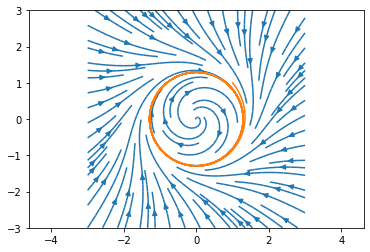

In [49]:
x = np.linspace(-3, 3)
y = np.linspace(-3, 3)
X, Y = np.meshgrid(x, y)
plt.figure()
eps = 0.5
c = 0.3
fig, ax = plt.subplots()
plt.streamplot(X, Y, *AH([X, Y], 0, eps, c))
traj = odeint(AH, np.array([1, 1]), t=np.linspace(0, 54, 3000), 
       args=(eps, c))
plt.plot(traj[:, 0], traj[:, 1])
ax.axis('equal')

### Модель Селькова
Уравнение взято [отсюда](https://en.wikipedia.org/wiki/Hopf_bifurcation).

$$\dot x = - x + ay + x^2 y,\quad \dot y = b - ay - x^2 y.$$

In [50]:
def Selkov(X, t, a, b):
    x, y = X
    return np.array([-x + a * y + x ** 2 * y,
                      b - a * y - x ** 2 * y])

In [53]:
from ipywidgets import interact, fixed

In [56]:
@interact(a=fixed(0.1), b=(0., 1., 0.1))
def draw_phase_portrait(a, b):
    x = np.linspace(0, 3)
    y = np.linspace(0, 3)
    X, Y = np.meshgrid(x, y)
    fig, ax = plt.subplots()
    plt.streamplot(X, Y, *Selkov([X, Y], 0, a, b))
    traj = odeint(Selkov, np.array([1, 1]), t=np.linspace(0, 54, 3000), 
           args=(a, b))
    plt.plot(traj[:, 0], traj[:, 1])
    ax.axis('equal')

interactive(children=(FloatSlider(value=0.5, description='b', max=1.0), Output()), _dom_classes=('widget-inter…